In [11]:
import numpy as np
import matplotlib.pyplot as plt
import lsst.afw.display as afwDisplay
display = afwDisplay.getDisplay()
from astropy import units as u

# 1 Raw quasar spectra

## 1a Plot the simulated quasar spectrum
I have attached a simulated quasar spectrum. Read the header in a text editor, then load the data into a numpy array in an iPython notebook. Plot the spectrum, including units on the axes.

In [1]:
quasar_file = '/Users/sullivan/LSST/Students/astr499/Vanden_Berk_quasars.txt'

From the header:

Units   Label  Explanations

--------------------------------------------------------------------------------

0.1nm   Wave   Wavelength in Angstroms
   
---     FluxD  Relative flux density
   
---   e_FluxD  The 68% semi-interquantile uncertainty in FluxD
  

In [3]:
spectrum = np.loadtxt(quasar_file, skiprows=23)

In [12]:
wavelength = spectrum[:, 0]*u.Angstrom
flux = spectrum[:, 1]
d_flux = spectrum[2, :]

In [15]:
wavelength.to(u.nm)

<Quantity [ 80.05,  80.15,  80.25, ..., 855.25, 855.35, 855.45] nm>

In [18]:
units = u.nm
print(f'wavelength ({units})')

wavelength (nm)


In [35]:
a = 3*units

In [ ]:
a.

In [78]:
def plot_spectrum(wavelength, flux,
                  units=u.nm,
                  redshift=0.,
                  wavelength_min=None,
                  wavelength_max=None,
                  logscale=False):

    fig, ax = plt.subplots(figsize=(8, 5))
    
    wl = wavelength.to(units)
    plt.plot(wl*(1 + redshift), flux)
    wl_min = wavelength_min if wavelength_min is not None else np.min(wl)
    wl_max = wavelength_max if wavelength_max is not None else np.max(wl)
    ax.set_xlim(wl_min.value, wl_max.value)
    plt.title(f'Quasar spectrum (redshift {redshift})')
    plt.xlabel(f'Wavelength ({units})')
    plt.ylabel('Relative flux')
    if logscale:
        ax.set_yscale('log')

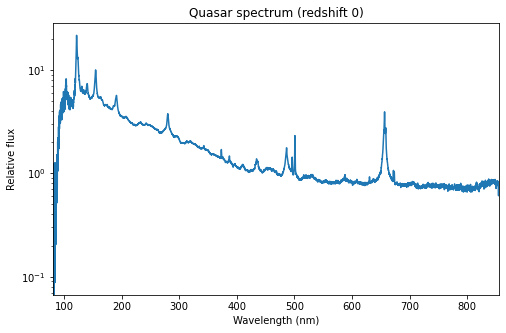

In [79]:
plot_spectrum(wavelength, flux, redshift=0, logscale=True)

## 1b Plot a few redshifted quasar spectra.
The given spectrum is for a quasar at redshift z=0 (i.e nearby). Plot the portion of the spectrum that is between 400-700nm. Then, calculate the spectrum that would be observed if the quasar was at a redshift of 1.0, 1.5, 2.0, and 2.5. Plot the portion of each spectrum that is between 400-700nm. The reason we're only looking at a small portion of the spectrum is to make the plots more manageable.

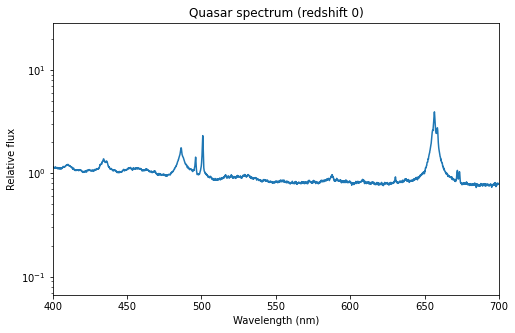

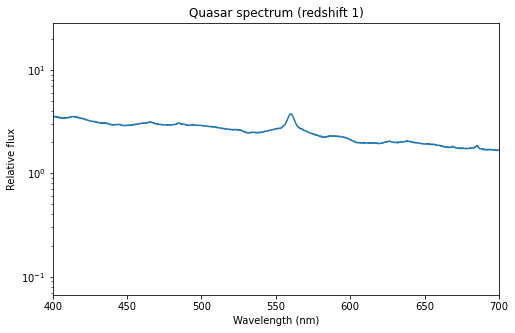

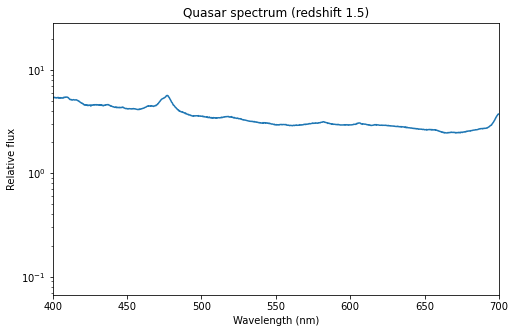

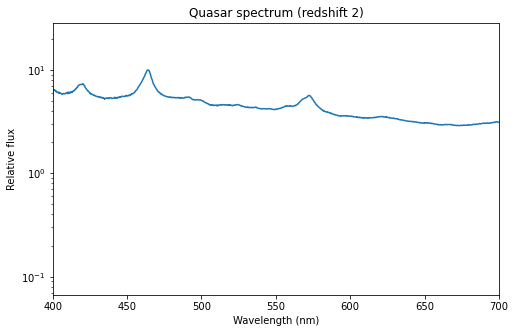

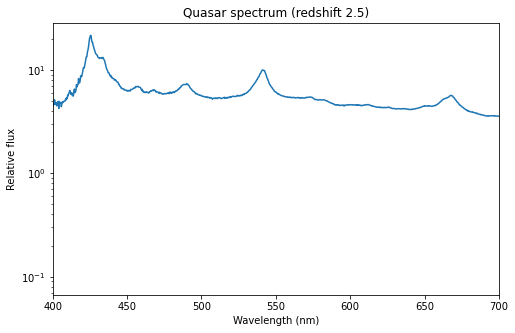

In [80]:
for redshift in [0, 1, 1.5, 2, 2.5]:
    plot_spectrum(wavelength, flux, redshift=redshift, logscale=True, wavelength_min=400*u.nm, wavelength_max=700*u.nm)

# 2 Real instrument bandpasses

## 2a Obtain the bandpasses
Clone the repository: https://github.com/lsst/throughputs
After cloning, look in the folder called 'baseline' and ignore all of the others.
Read the Readme.md and determine which files you need to use to load the total throughput curves for g- and i-bands. Write down the relevant filepaths (or at least the filenames) in your notebook.

Filepaths for g- and i-band total throughput curves:

In [55]:
throughput_g_file = '/Users/sullivan/LSST/code/build/throughputs/baseline/total_g.dat'
throughput_i_file = '/Users/sullivan/LSST/code/build/throughputs/baseline/total_i.dat'

## 2b Plot the bandpasses
Load the data files you determined in 2a, and plot the total throughput curves for LSST g- and i-band. Include units on your axes labels.

From the header:

LSST Throughputs files created from syseng_throughputs repo

Version 1.7

sha1 210c34a5e8db12316cd05499aae5fe9a9f4e8c32

Aerosols added to atmosphere

Wavelen_cutoff_BLUE 386.30

Wavelen_cutoff_RED 567.00

Wavelength(nm)  Throughput(0-1)

In [64]:
arr = np.loadtxt(throughput_g_file, skiprows=7)
throughput_g = arr[:, 1]
throughput_g_wl = arr[:, 0]*u.nm
arr = np.loadtxt(throughput_i_file, skiprows=7)
throughput_i = arr[:, 1]
throughput_i_wl = arr[:, 0]*u.nm

In [75]:
def plot_throughput(wavelength, throughput, band,
                    units=u.nm,
                    wavelength_min=None,
                    wavelength_max=None,
                    logscale=False,
                    color=None):

    fig, ax = plt.subplots(figsize=(8, 5))
    
    wl = wavelength.to(units)
    plt.plot(wl, throughput, color=color)
    wl_min = wavelength_min if wavelength_min is not None else np.min(wl)
    wl_max = wavelength_max if wavelength_max is not None else np.max(wl)
    ax.set_xlim(wl_min.value, wl_max.value)
    plt.title(f'Total {band}-band throughput')
    plt.xlabel(f'Wavelength ({units})')
    plt.ylabel('Releative transmission')
    if logscale:
        ax.set_yscale('log')

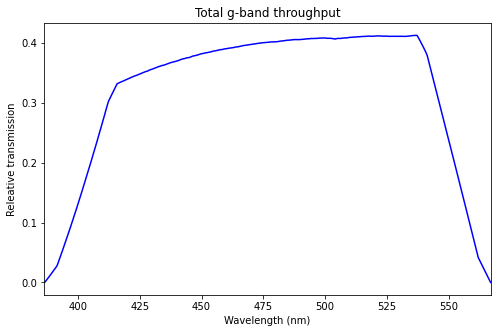

In [76]:
plot_throughput(throughput_g_wl, throughput_g, 'g', wavelength_min=386.30*u.nm, wavelength_max=567*u.nm, color='blue')

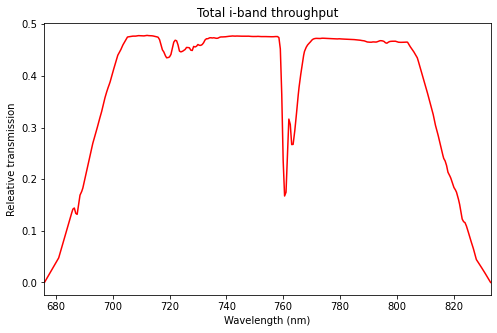

In [77]:
plot_throughput(throughput_i_wl, throughput_i, 'i', wavelength_min=675.90*u.nm, wavelength_max=833*u.nm, color='red')

# 3 Observed quasar spectra

## 3a Plot the observed spectrum
Take your redshifted spectra from 1b and the instrument bandpasses from 2b, and plot the expected observed spectrum for each quasar in each band. Make sure to limit the wavelength ranges of your plots to only those regions with significant values, and make sure that the spectra and the bandpasses are calculated at the same wavelengths. You can either interpolate or find the nearest match to each bin, but make sure your notebook makes it clear what approach you are taking.

In [81]:
def plot_filtered_spectrum(wavelength, flux, throughput_wl, throughput, band,
                           units=u.nm,
                           redshift=0.,
                           wavelength_min=None,
                           wavelength_max=None,
                           logscale=False,
                           color=None):

    fig, ax = plt.subplots(figsize=(8, 5))
    
    wl = wavelength.to(units)*(1 + redshift)
    t_wl = throughput_wl.to(units)
    t = np.interp(wl.value, t_wl.value, throughput)
    plt.plot(wl, flux*t, color)
    wl_min = wavelength_min if wavelength_min is not None else np.min(wl)
    wl_max = wavelength_max if wavelength_max is not None else np.max(wl)
    ax.set_xlim(wl_min.value, wl_max.value)
    plt.title(f'{band}-band quasar spectrum (redshift {redshift})')
    plt.xlabel(f'Wavelength ({units})')
    plt.ylabel('Relative flux')
    if logscale:
        ax.set_yscale('log')

## g-band quasar spectra

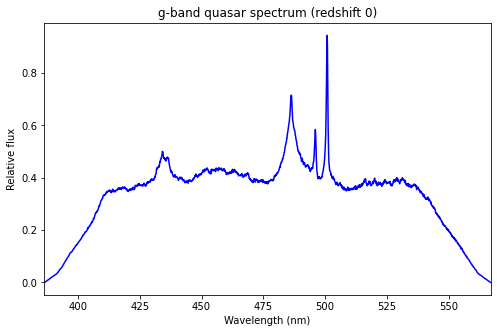

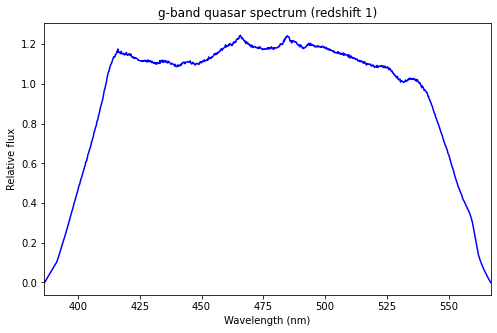

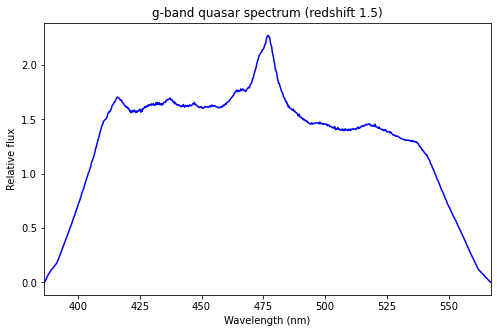

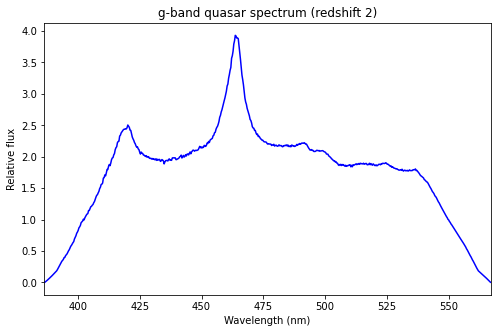

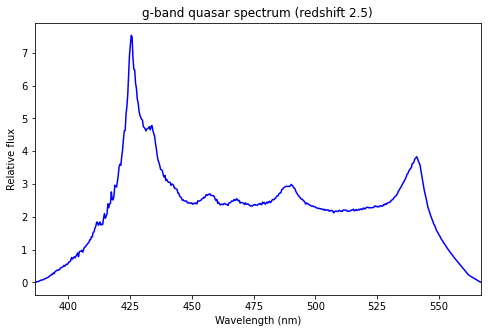

In [84]:
for redshift in [0,1,1.5,2,2.5]:
    plot_filtered_spectrum(wavelength, flux, throughput_g_wl, throughput_g, 'g', redshift=redshift, wavelength_min=386.30*u.nm, wavelength_max=567*u.nm, color='blue')

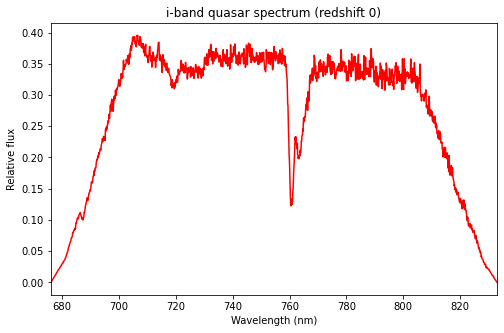

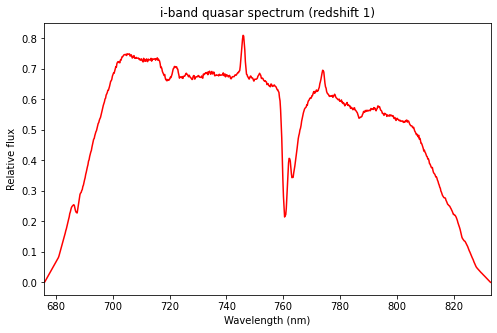

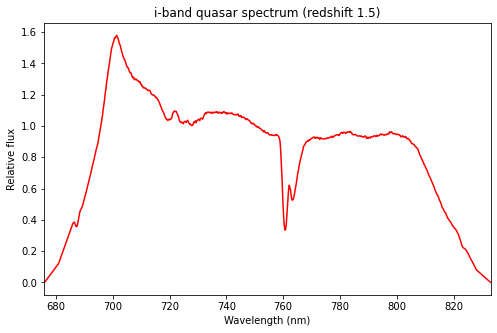

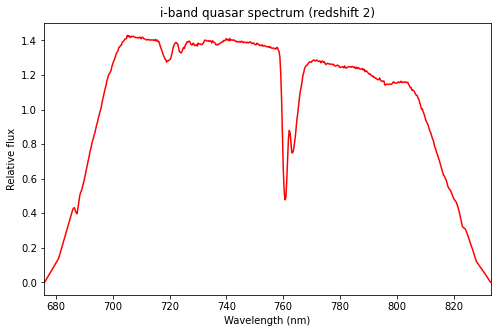

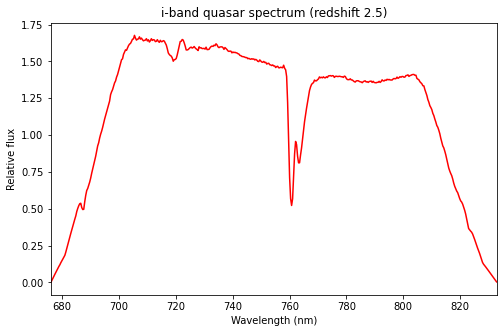

In [85]:
for redshift in [0,1,1.5,2,2.5]:
    plot_filtered_spectrum(wavelength, flux, throughput_i_wl, throughput_i, 'i', redshift=redshift, wavelength_min=675.90*u.nm, wavelength_max=833*u.nm, color='red')

## 3b Expected flux of each quasar
For redshift 0 quasar and each redshifted quasar and each band, calculate the total flux that you would expect to measure. Don't worry about the units or scaling the brightness with distance. In fact, you can define the measured flux of the z=0 quasar to be 1.0 in g-band, and use that normalization to scale all of the other measurements.

In [98]:
def calculate_flux(wavelength, flux, throughput_wl, throughput, band,
                   units=u.nm,
                   redshift=0.,
                   wavelength_min=None,
                   wavelength_max=None):
    
    wl = wavelength.to(units)*(1 + redshift)
    t_wl = throughput_wl.to(units)
    t = np.interp(wl.value, t_wl.value, throughput)
    wl_min = wavelength_min if wavelength_min is not None else np.min(wl)
    wl_max = wavelength_max if wavelength_max is not None else np.max(wl)
    flux_obs = flux*t
    inds = np.where(np.logical_and(wl.value < wl_max.value, wl.value > wl_min.value))
    
    flux_tot = np.sum(flux_obs[inds])
    wl_step = wl[1].value - wl[0].value
    return flux_tot*wl_step

In [106]:
band = 'g'
for redshift in [0,1,1.5,2,2.5]:
    f = calculate_flux(wavelength, flux, throughput_g_wl, throughput_g, band, redshift=redshift)
    print(f'{band}-band redshift {redshift} flux: {f}')

g-band redshift 0 flux: 60.395566354922494
g-band redshift 1 flux: 170.44063224360553
g-band redshift 1.5 flux: 236.12240260164947
g-band redshift 2 flux: 317.92926780865173
g-band redshift 2.5 flux: 416.5770234454493


In [107]:
band = 'i'
for redshift in [0,1,1.5,2,2.5]:
    f = calculate_flux(wavelength, flux, throughput_i_wl, throughput_i, band, redshift=redshift)
    print(f'{band}-band redshift {redshift} flux: {f}')

i-band redshift 0 flux: 43.19084989027192
i-band redshift 1 flux: 80.08202142728406
i-band redshift 1.5 flux: 130.79108016330284
i-band redshift 2 flux: 162.738352944738
i-band redshift 2.5 flux: 186.37602527405704
